In [1]:
%matplotlib inline
import obspy
import io
import matplotlib.pyplot as plt

# def

In [2]:
# inventory = obspy.read_inventory('fdsn-station_2021-06-29T11_00_50.xml', format="STATIONXML")
inventory = obspy.read_inventory('fdsn-station_2021-06-29T13_31_12.xml', format="STATIONXML")

In [19]:
#https://discourse.obspy.org/t/large-miniseed-files-read-in-chunks/1109

path = '/media/sda/data/borehole/queryauth?net=7F&sta=A00&cha=GDH&starttime=2019-01-01&endtime=2021-01-01&format=miniseed&nodata=404'

i = 0

streams = []

reclen = 512
# chunksize = 100000 * reclen # Around 50 MB
chunksize = 100000 * reclen # Around 50 MB
with io.open(path, "rb") as fh:
    while True:
        with io.BytesIO() as buf:
            c = fh.read(chunksize)
            
            if not c:
                break
            buf.write(c)
            buf.seek(0, 0)
            
            if 'st' not in locals():
                st = obspy.read(buf)
            else:
                st = st + obspy.read(buf)
#             st = obspy.read(buf)
#             streams.append(st)
#             st = obspy.read(buf)
#             if 'st' not in locals():
#                 st = obspy.read(buf)
#             else:
#                 st_new = obspy.read(buf)
#                 st = st.append(st_new)
            
#         # Do something useful!
#         print(st)
        
        if i > 5:
            break
        else:
            i += 1

In [21]:
st.merge()

1 Trace(s) in Stream:
7F.A00.01.GDH | 2019-05-01T04:30:17.998000Z - 2019-05-07T01:45:37.401000Z | 1000.0 Hz, 508519404 samples

In [22]:
st

1 Trace(s) in Stream:
7F.A00.01.GDH | 2019-05-01T04:30:17.998000Z - 2019-05-07T01:45:37.401000Z | 1000.0 Hz, 508519404 samples

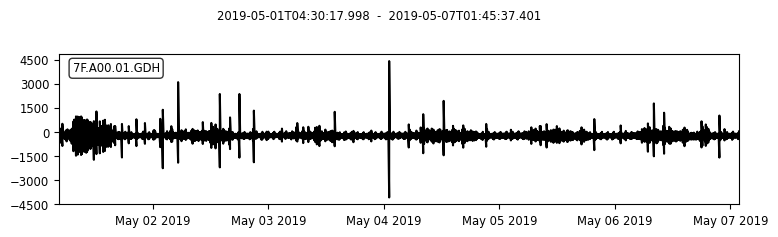

In [24]:
x = st.plot()

In [ ]:
st.resample(sampling_rate=3600)

In [ ]:
st.spectrogram()

In [ ]:
st.plot()

In [12]:
(streams[0] + streams[1])

2 Trace(s) in Stream:
7F.A00.01.GDH | 2019-05-01T04:30:17.998000Z - 2019-05-02T00:40:12.434000Z | 1000.0 Hz, 72594437 samples
7F.A00.01.GDH | 2019-05-02T00:40:12.435000Z - 2019-05-02T20:51:21.392000Z | 1000.0 Hz, 72668958 samples

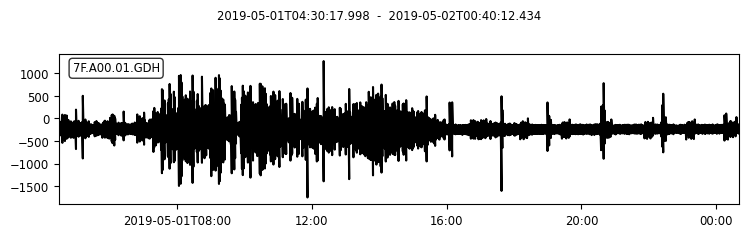

In [15]:
x = streams[0].plot()

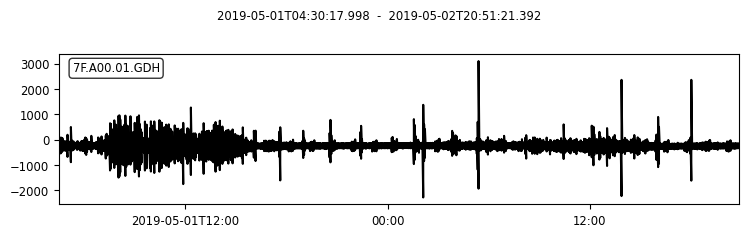

In [16]:
x = (streams[0] + streams[1]).merge().plot()

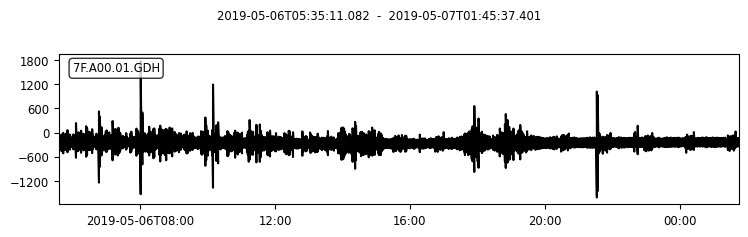

In [5]:
x = st.plot()

In [6]:
st.resample(sampling_rate=60)

1 Trace(s) in Stream:
7F.A00.01.GDH | 2019-05-06T05:35:11.082000Z - 2019-05-07T01:45:37.382000Z | 60.0 Hz, 4357579 samples

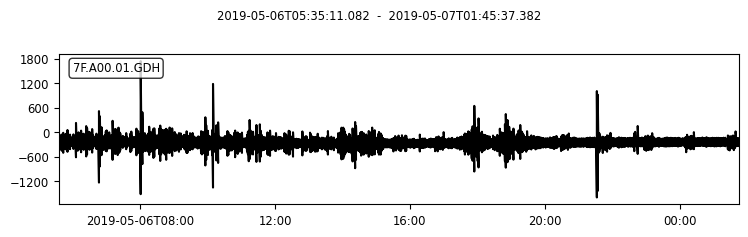

In [7]:
x = st.plot()

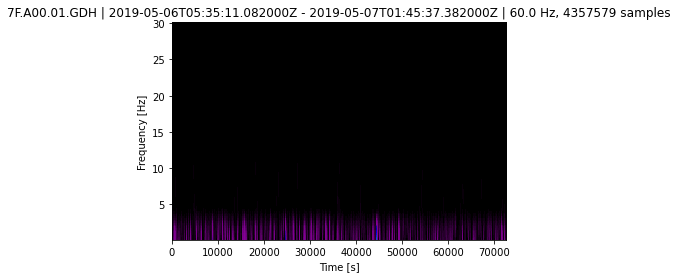

[None]

In [8]:
# fig, ax = plt.subplots(figsize=(15, 7))
st.spectrogram(cmap='nipy_spectral')

In [ ]:
# x = st.plot(starttime=obspy.UTCDateTime('2019-05-01T17:30:17.998000Z'), endtime=obspy.UTCDateTime('2019-05-01T17:40:17.998000Z'))

In [ ]:
# st.remove_response(inventory=inventory)
# x = st.plot()

In [ ]:
# st.detrend()
# x = st.plot()

In [ ]:
# fig, ax = plt.subplots()

# st.plot(ax=ax)

In [ ]:
# inventory.get_response('7F.A00.01.GHD', datetime=obspy.UTCDateTime('2019-05-01T04:30:17.998000Z'))